In [1]:
%run ../../analysis_funcs.py

In [2]:
##Load parameters to check easily
with open("parameters.txt",'r') as fl:
    parameters = fl.readlines()

In [3]:
parameters

['N (number of taxa): 500\n',
 'M (number of samples): 150\n',
 'lam: 0.3 (LASSO parameter lambda for GLASSO)\n',
 'ch: 0 (chunkiness for NormalCowboy)\n',
 'ns: 2 (Number of simualted data types)\n',
 'gsp: 0.05 (approximate sparsity of ground truth)\n',
 'norms: add_pseudocounts (how count data is normalized by the method)\n',
 'grmod: PL (which graph model to base ground truth on)\n',
 'mean_spread: 4 (spread of log-means of absolute abundances)\n',
 'mean_center: 0 (center of uniform distrubition of log-means of absolute abundances)\n',
 'L (number of trials): 15\n',
 'mxvar: 2 (Max variance of absuolute abundances)\n',
 'mnvar: 0.3 (Min variance of absuolute abundances)\n',
 'hubcut (eigenvector centrality cutoff to consider a node a hub for comparison between networks): 0.3\n',
 'average read depth: 100000\n',
 'Standard deviation of read depth: 10000\n',
 'Use Correlation (instead of covariance): False\n']

In [4]:
all_cov,splits = load_all_covariance()

In [5]:
all_cor,splits = load_all_correlation()

In [6]:
cov_rmse = make_RMSE_df(all_cov)

In [7]:
cov_rmse

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
0         0.13711  0.132895  0.127051  0.132762      0.03669      0.03659
1         0.13988  0.129498  0.121386  0.129355     0.035647     0.035395
2        0.141282  0.137201  0.127467  0.137061     0.037843     0.037555
3        0.136378  0.128569  0.120594  0.128442     0.034291      0.03416
4        0.134738  0.129793  0.122509  0.129655      0.03669     0.036427
5        0.143095  0.132981  0.125544  0.132839     0.036735     0.036512
6        0.133688  0.127089  0.120576  0.126956     0.036294     0.036074
7        0.127979  0.123866  0.121876   0.12372     0.036535     0.036558
8        0.143095    0.1328  0.118846   0.13266     0.035154     0.034901
9        0.129729  0.122026  0.118624  0.121887     0.035102     0.034995
10       0.135432  0.130728  0.126965  0.130579     0.038082     0.037935
11       0.140255   0.13319  0.124193   0.13305     0.036295     0.036064
12       0.143791   0.13512  0.125652  0.134975     0.038149     0.037718
13       0.137273  0.133493  0.123494  0.133372     0.035119     0.034837
14       0.150239  0.137584  0.126954  0.137455     0.037911      0.03744

In [8]:
edge_str = make_mean_edge_str_df(all_cov)

Text(0, 0.5, 'Mean Edge Magnitude')

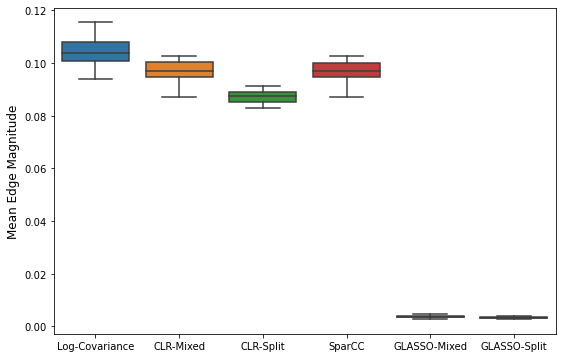

In [9]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data =edge_str,ax=ax)
ax.set_ylabel("Mean Edge Magnitude",size=12)
# ax.set_ylim(0.17,0.43)# ax.set_title("Coefficient of Determination of Linear Regression between True Edges and Fit Edges",size=15)

In [10]:
xk_edge_str = make_XK_mean_edge_str_df(all_cov,splits)

Text(0, 0.5, 'Mean Edge Magnitude')

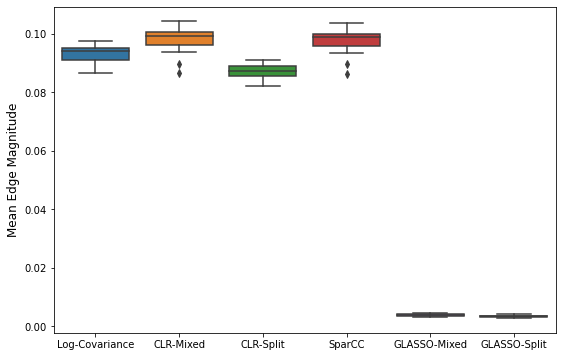

In [11]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data =xk_edge_str,ax=ax)
ax.set_ylabel("Mean Edge Magnitude",size=12)
# ax.set_ylim(0.17,0.43)# ax.set_title("Coefficient of Determination of Linear Regression between True Edges and Fit Edges",size=15)

(0.039, 0.21)

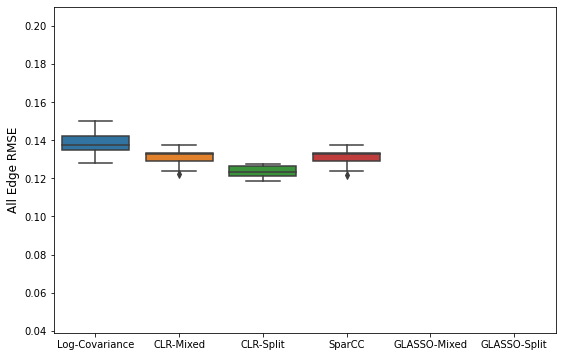

In [12]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data =cov_rmse,ax=ax)
ax.set_ylabel("All Edge RMSE",size=12)
ax.set_ylim(0.039,0.21)

In [13]:
significance_df = pd.DataFrame(index = cov_rmse.columns,columns = cov_rmse.columns)
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(cov_rmse[rw],cov_rmse[col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.000702       0.0  0.000579          0.0   
CLR-Mixed            0.000702       1.0  0.000007  0.933042          0.0   
CLR-Split                 0.0  0.000007       1.0  0.000009          0.0   
SparCC               0.000579  0.933042  0.000009       1.0          0.0   
GLASSO-Mixed              0.0       0.0       0.0       0.0          1.0   
GLASSO-Split              0.0       0.0       0.0       0.0     0.607543   

               GLASSO-Split  
Log-Covariance          0.0  
CLR-Mixed               0.0  
CLR-Split               0.0  
SparCC                  0.0  
GLASSO-Mixed       0.607543  
GLASSO-Split            1.0

In [14]:
cov_XK_rmse = make_XK_RMSE_df(all_cov,splits)

In [15]:
cov_XK_rmse

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
0         0.13191  0.133459  0.126484  0.132813     0.036078     0.035801
1        0.128022  0.130868  0.120985  0.130072     0.034096     0.033549
2        0.134867  0.139463  0.128369  0.138603     0.037589     0.036944
3        0.131327  0.133905  0.123154  0.133148     0.033861     0.033201
4        0.127374  0.130774  0.122058  0.130001     0.035549     0.034956
5         0.13367  0.136849  0.127709  0.136067     0.036007     0.035402
6        0.125929  0.128332  0.120621  0.127638     0.035069     0.034557
7        0.122317  0.121974  0.118438  0.121639     0.033888     0.033638
8        0.126735   0.13406  0.118329  0.132994     0.033175     0.032427
9        0.124403  0.124346  0.118375  0.123899     0.033885     0.033496
10       0.130645  0.131718  0.126217  0.131234     0.036432     0.036087
11       0.129336  0.134066  0.123243  0.133112     0.035108     0.034463
12       0.132517  0.136736  0.125897  0.135915     0.036863      0.03616
13       0.129951   0.13417  0.122834  0.133314     0.033768     0.033259
14       0.133484  0.138504  0.125884  0.137499     0.034948     0.034126

(0.039, 0.21)

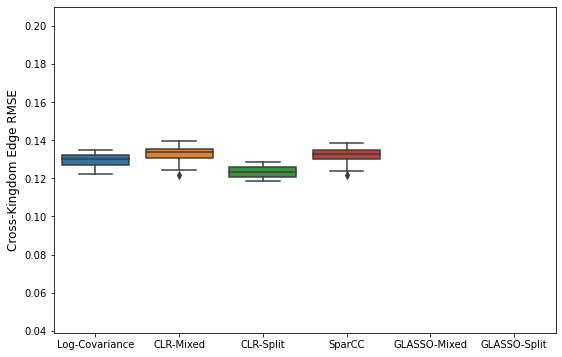

In [16]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data =cov_XK_rmse,ax=ax)
ax.set_ylabel("Cross-Kingdom Edge RMSE",size=12)
ax.set_ylim(0.039,0.21)

In [17]:
significance_df = pd.DataFrame(index = cov_XK_rmse.columns,columns = cov_XK_rmse.columns)
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(cov_XK_rmse[rw],cov_XK_rmse[col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.057428  0.000042  0.136078          0.0   
CLR-Mixed            0.057428       1.0  0.000001  0.671024          0.0   
CLR-Split            0.000042  0.000001       1.0  0.000004          0.0   
SparCC               0.136078  0.671024  0.000004       1.0          0.0   
GLASSO-Mixed              0.0       0.0       0.0       0.0          1.0   
GLASSO-Split              0.0       0.0       0.0       0.0      0.26121   

               GLASSO-Split  
Log-Covariance          0.0  
CLR-Mixed               0.0  
CLR-Split               0.0  
SparCC                  0.0  
GLASSO-Mixed        0.26121  
GLASSO-Split            1.0

In [18]:
coeff_dets = make_coeff_det_df(all_cov)
coeff_dets

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
0        0.255063  0.264592  0.275327   0.26515     0.361622     0.363694
1        0.248113  0.260359   0.27683  0.261189      0.34783     0.357784
2        0.248484  0.253426  0.269898  0.254012     0.323458     0.329134
3        0.250223  0.253546  0.264388  0.254023     0.331907     0.330923
4        0.255976  0.263798  0.277771  0.264445     0.343354     0.352213
5        0.243747  0.256196  0.267321  0.256951     0.328085     0.331155
6         0.25389  0.258901   0.27081  0.259439     0.317177      0.32413
7          0.2577  0.264295   0.26562  0.265068     0.330835      0.32742
8        0.233474  0.244652  0.266777   0.24549     0.297796     0.299217
9        0.250955   0.26124  0.267266  0.261959      0.31101     0.313714
10       0.257616  0.261538  0.268659  0.262227     0.345771     0.350275
11       0.242722  0.249784  0.264063  0.250413     0.316836     0.319549
12       0.242056  0.250122   0.26827  0.250909     0.320634      0.33391
13       0.242157  0.245719  0.263587  0.246151     0.320667     0.328026
14       0.246268  0.259035  0.278176  0.259497     0.364115     0.378956

In [19]:
significance_df = pd.DataFrame(index = coeff_dets.columns,columns = coeff_dets.columns)
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(coeff_dets[rw],coeff_dets[col]).pvalue

In [20]:
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.003437       0.0  0.001769          0.0   
CLR-Mixed            0.003437       1.0  0.000001  0.790974          0.0   
CLR-Split                 0.0  0.000001       1.0  0.000003          0.0   
SparCC               0.001769  0.790974  0.000003       1.0          0.0   
GLASSO-Mixed              0.0       0.0       0.0       0.0          1.0   
GLASSO-Split              0.0       0.0       0.0       0.0     0.471118   

               GLASSO-Split  
Log-Covariance          0.0  
CLR-Mixed               0.0  
CLR-Split               0.0  
SparCC                  0.0  
GLASSO-Mixed       0.471118  
GLASSO-Split            1.0

(0.17, 0.43)

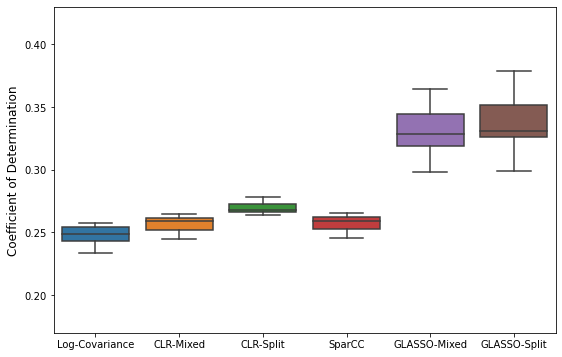

In [21]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data = make_coeff_det_df(all_cov),ax=ax)
ax.set_ylabel("Coefficient of Determination",size=12)
ax.set_ylim(0.17,0.43)# ax.set_title("Coefficient of Determination of Linear Regression between True Edges and Fit Edges",size=15)

In [22]:
coeff_dets_XK = make_XK_coeff_det_df(all_cov,splits)

In [23]:
significance_XK_df = pd.DataFrame(index = coeff_dets_XK.columns,columns = coeff_dets_XK.columns)
for col in significance_XK_df.columns:
    for rw in significance_XK_df.index:
        significance_XK_df.loc[rw,col] = stats.ttest_ind(coeff_dets_XK[rw],coeff_dets_XK[col]).pvalue

In [24]:
significance_XK_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.098198  0.000762  0.081351     0.338519   
CLR-Mixed            0.098198       1.0  0.053675  0.920216      0.66951   
CLR-Split            0.000762  0.053675       1.0  0.067006     0.846602   
SparCC               0.081351  0.920216  0.067006       1.0     0.692913   
GLASSO-Mixed         0.338519   0.66951  0.846602  0.692913          1.0   
GLASSO-Split         0.015877  0.054202  0.181583   0.05809     0.271168   

               GLASSO-Split  
Log-Covariance     0.015877  
CLR-Mixed          0.054202  
CLR-Split          0.181583  
SparCC              0.05809  
GLASSO-Mixed       0.271168  
GLASSO-Split            1.0

(0.15, 0.4)

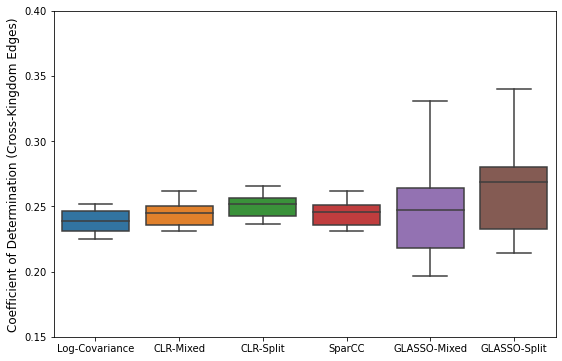

In [25]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data = make_XK_coeff_det_df(all_cov,splits),ax=ax)
ax.set_ylabel("Coefficient of Determination (Cross-Kingdom Edges)",size=12)
ax.set_ylim(0.15,0.4)

In [26]:
coeff_dets_emp = make_coeff_det_df(all_cov,true_column = "Absolute Emperical")

(0.0, 0.2)

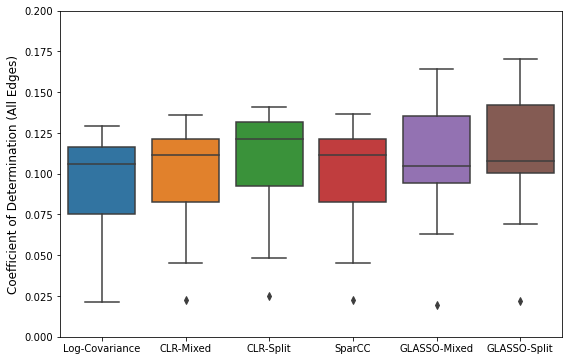

In [27]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data = coeff_dets_emp,ax=ax)
ax.set_ylabel("Coefficient of Determination (All Edges)",size=12)
ax.set_ylim(0,0.2)

In [28]:
coeff_dets_emp_XK = make_XK_coeff_det_df(all_cov,splits,true_column = "Absolute Emperical")

(0.0, 0.2)

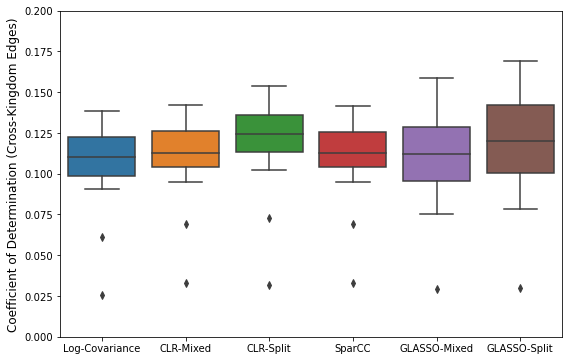

In [29]:
fig,ax = plt.subplots(figsize = (9,6))
sb.boxplot(data = coeff_dets_emp_XK,ax=ax)
ax.set_ylabel("Coefficient of Determination (Cross-Kingdom Edges)",size=12)
ax.set_ylim(0,0.2)

In [30]:
def bias(all_edges_arr,split):
    grp1_edges = all_edges_arr[:split,:split]
    grp1_edges = grp1_edges[np.triu_indices_from(grp1_edges,k=1)]
    grp2_edges = all_edges_arr[split:,split:]
    grp2_edges = grp2_edges[np.triu_indices_from(grp2_edges,k=1)]
    xk_edges = all_edges_arr[split:,:split].flatten() #upper corner
    edge_means = {"G1_Mean":np.mean(grp1_edges/np.max(np.abs(grp1_edges))),"G2_Mean":np.mean(grp2_edges/np.max(np.abs(grp2_edges))),"XK_Mean":np.mean(xk_edges/np.max(np.abs(xk_edges)))}
    return edge_means

In [31]:
all_biases = pd.DataFrame(index = ["G1_{}_{}".format(k,nm) for k in all_cov.keys() for nm in all_cov[0].keys()] + ["G2_{}_{}".format(k,nm) for k in all_cov.keys() for nm in all_cov[0].keys()] + ["XK_{}_{}".format(k,nm) for k in all_cov.keys() for nm in all_cov[0].keys()],columns = ["Group","Edge Mean","Reconstruction Method"])
for k,val in all_cov.items():
    for nm,net in val.items():
        bias_dict = bias(net,splits.loc[k,0])
        all_biases.loc["G1_{}_{}".format(k,nm)] = ["Intra-Kingdom 1",bias_dict["G1_Mean"],nm]
        all_biases.loc["G2_{}_{}".format(k,nm)] = ["Intra-Kingdom 2",bias_dict["G2_Mean"],nm]
        all_biases.loc["XK_{}_{}".format(k,nm)] = ["Cross-Kingdom",bias_dict["XK_Mean"],nm]

<AxesSubplot:xlabel='Reconstruction Method', ylabel='Edge Mean'>

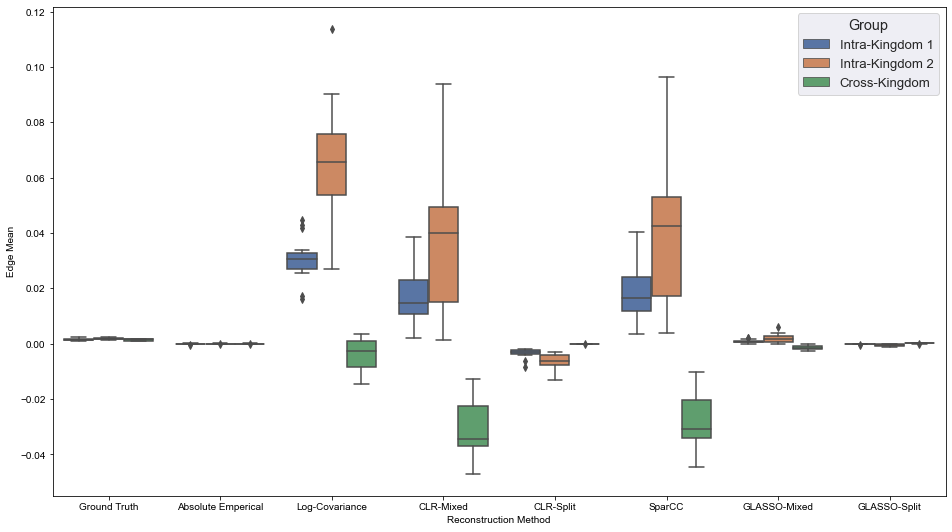

In [32]:
fig,ax = plt.subplots(figsize = (16,9))
sb.set(font_scale=1.2)
sb.boxplot(data = all_biases,x = "Reconstruction Method", y = "Edge Mean", hue = "Group",ax = ax)

In [33]:
len(all_cov)

15

In [218]:
topacc = all_top_accuracy(all_cov,100)

KeyboardInterrupt: 

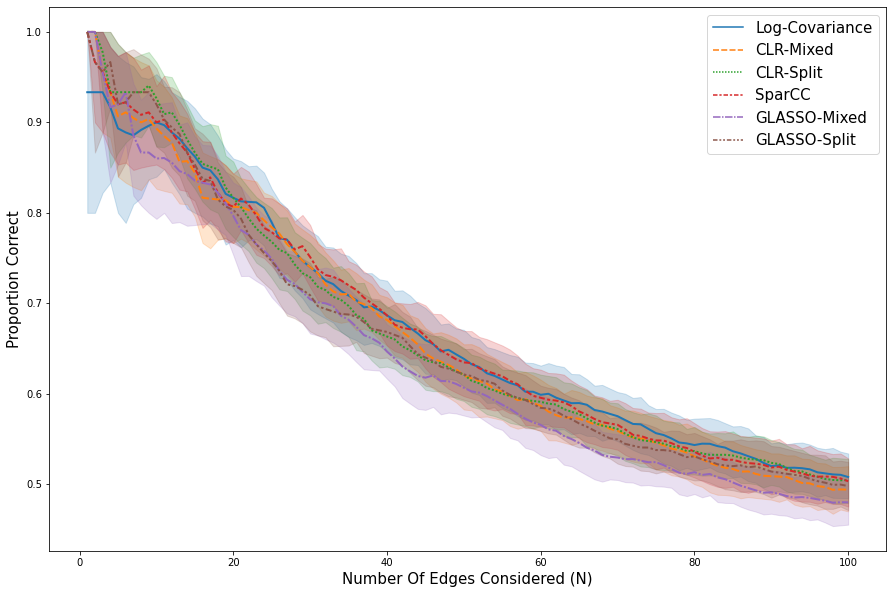

In [207]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = topacc,ax = ax,linewidth=2)
ax.set_ylabel("Proportion Correct",size=15)
ax.set_xlabel("Number Of Edges Considered (N)",size=15)
plt.legend(fontsize=15)

In [215]:
test_net = "GLASSO-Split"
significance_df = pd.DataFrame(index = topacc.index,columns = topacc.columns.unique())
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(topacc.loc[rw,test_net],topacc.loc[rw,col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
1         0.325875       NaN       NaN       NaN          NaN          NaN
2         0.658161  0.325875  0.325875       1.0     0.325875          1.0
3         0.699418       1.0   0.55886       1.0          1.0          1.0
4          0.28489  0.378718    0.4605  0.378718      0.28489          1.0
5         0.663719  0.806927   0.79018       1.0          1.0          1.0
..             ...       ...       ...       ...          ...          ...
96        0.638776   0.78344  0.801196   0.82229      0.31535          1.0
97        0.616061  0.813654  0.831484  0.748288     0.329879          1.0
98        0.564627  0.782455  0.775544  0.671256     0.321597          1.0
99        0.587527  0.778511  0.805313  0.740393     0.336687          1.0
100       0.613483  0.838504   0.73267  0.789434     0.374785          1.0

[100 rows x 6 columns]

<AxesSubplot:>

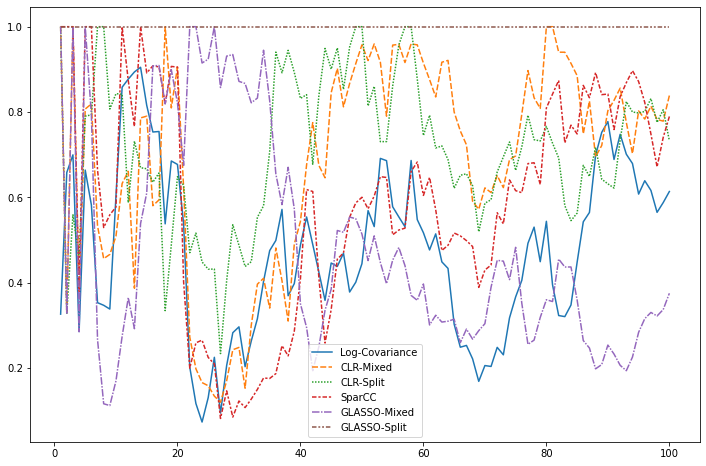

In [217]:
fig,ax = plt.subplots(figsize = (12,8))
sb.lineplot(data = significance_df.fillna(1),ax=ax)

In [14]:
topXKacc = all_top_XK_accuracy(all_cov,splits,100)

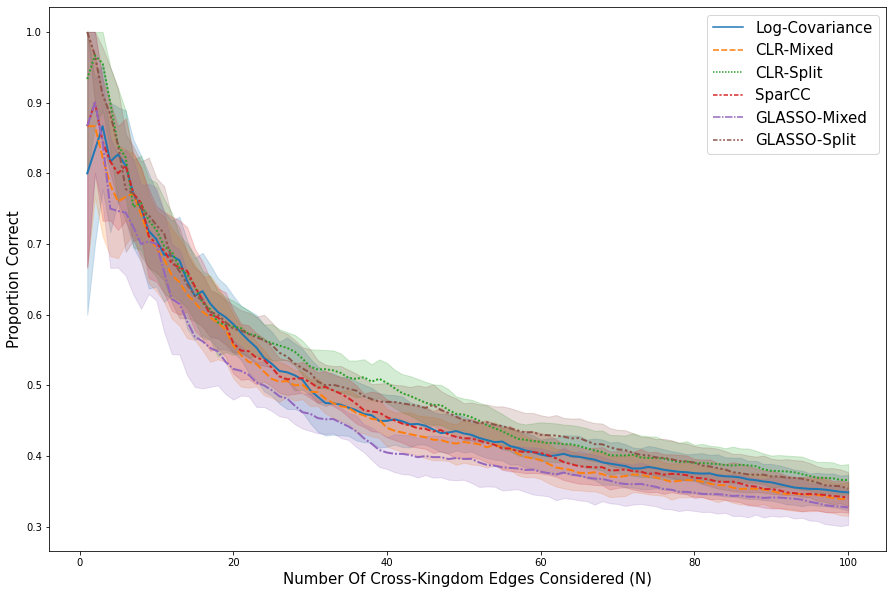

In [208]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = topXKacc,ax = ax,linewidth=2)
ax.set_ylabel("Proportion Correct",size=15)
ax.set_xlabel("Number Of Cross-Kingdom Edges Considered (N)",size=15)
plt.legend(fontsize=15)

In [213]:
test_net = "GLASSO-Split"
significance_df = pd.DataFrame(index = topXKacc.index,columns = topXKacc.columns.unique())
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(topXKacc.loc[rw,test_net],topXKacc.loc[rw,col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
1         0.071854  0.153357  0.325875  0.153357     0.153357          NaN
2         0.071854  0.151661       1.0  0.298964     0.298964          1.0
3         0.456005  0.199956  0.378718  0.333303     0.271185          1.0
4          0.28683  0.151661  0.754175  0.246673     0.046253          1.0
5         0.811677  0.192025       1.0  0.480116     0.135268          1.0
..             ...       ...       ...       ...          ...          ...
96        0.624352   0.34194   0.69773  0.370446     0.152319          1.0
97        0.732195  0.385527  0.564857  0.452838      0.15954          1.0
98        0.708985  0.342851  0.540624  0.436428     0.154772          1.0
99        0.652119  0.310287  0.616382   0.40814     0.142872          1.0
100       0.769015  0.418014  0.493175  0.464033     0.165522          1.0

[100 rows x 6 columns]

<AxesSubplot:>

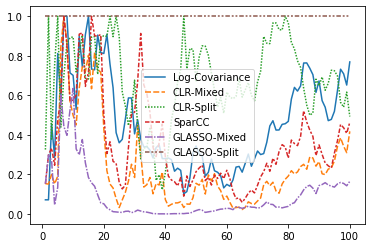

In [214]:
sb.lineplot(data = significance_df.fillna(1))

In [16]:
roc_all_edges = all_classifier_performance_topN(all_cov,-1)

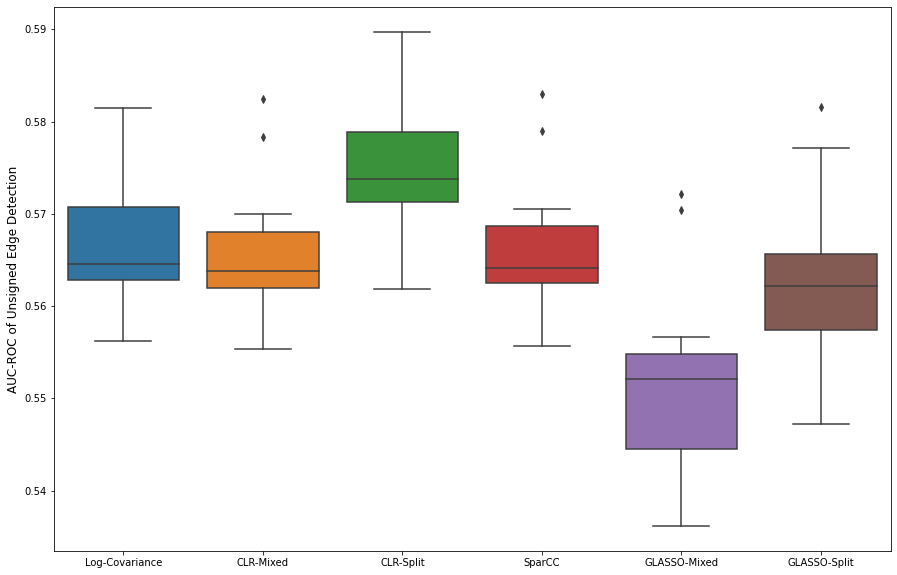

In [107]:
fig,ax = plt.subplots(figsize = (15,10))
sb.boxplot(data = roc_all_edges[0],ax=ax)
ax.set_ylabel("AUC-ROC of Unsigned Edge Detection",size=12);

In [296]:
significance_df = pd.DataFrame(index = roc_all_edges[0].columns,columns = roc_all_edges[0].columns)
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(roc_all_edges[0][rw],roc_all_edges[0][col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.633127   0.00516  0.791849      0.00006   
CLR-Mixed            0.633127       1.0  0.001638  0.833055     0.000194   
CLR-Split             0.00516  0.001638       1.0  0.002913          0.0   
SparCC               0.791849  0.833055  0.002913       1.0     0.000122   
GLASSO-Mixed          0.00006  0.000194       0.0  0.000122          1.0   
GLASSO-Split         0.150335  0.308287  0.000266  0.230111     0.004647   

               GLASSO-Split  
Log-Covariance     0.150335  
CLR-Mixed          0.308287  
CLR-Split          0.000266  
SparCC             0.230111  
GLASSO-Mixed       0.004647  
GLASSO-Split            1.0

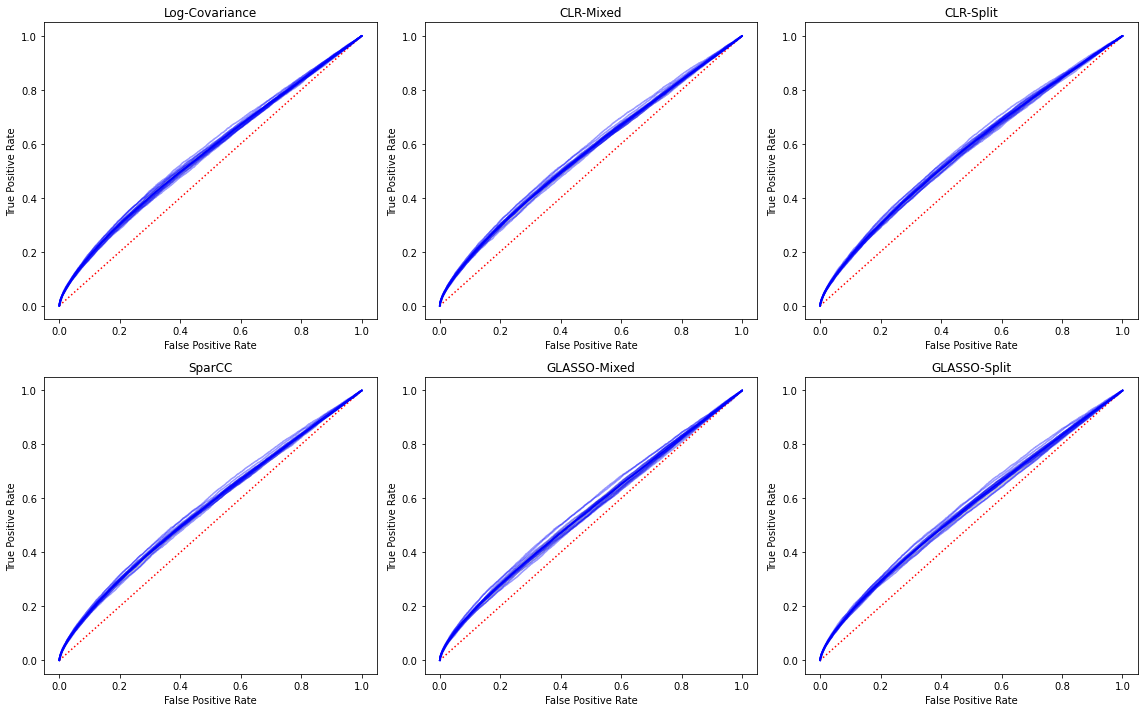

In [18]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    ax[divmod(n,3)].plot([0,1],[0,1],':',color = 'red')
    tprs = []
    for tr in roc_all_edges[1][meth]:
        ax[divmod(n,3)].plot(tr[0],tr[1],color = 'blue',alpha = 0.4)
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax[divmod(n,3)].plot(base_fpr,np.array(tprs).mean(axis = 0),color = 'blue')
    tprs_lower = np.maximum(np.array(tprs).mean(axis = 0) - np.array(tprs).std(axis = 0),0)
    tprs_upper = np.minimum(np.array(tprs).mean(axis = 0) + np.array(tprs).std(axis = 0),1)

    ax[divmod(n,3)].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    ax[divmod(n,3)].set_xlabel("False Positive Rate")
    ax[divmod(n,3)].set_ylabel("True Positive Rate")
    ax[divmod(n,3)].set_title(meth)

In [298]:
df = make_edge_df(all_cov[0])

In [306]:
(df["Ground Truth"].abs() > 10**-8).sum()

9003

In [310]:
roc_top_edges = all_classifier_performance(all_cov,Ns = np.arange(100,9000,400))

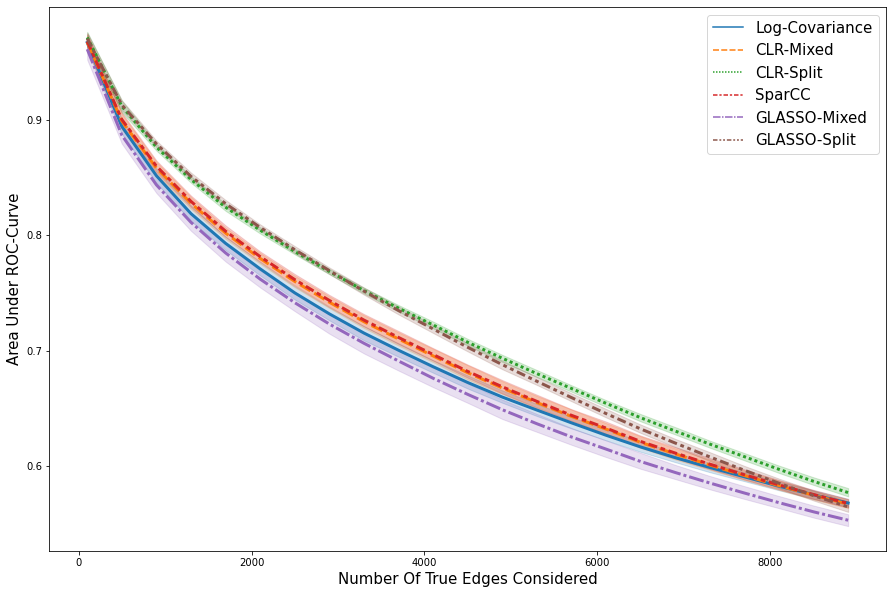

In [311]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = roc_top_edges,ax = ax,linewidth=3)
ax.set_ylabel("Area Under ROC-Curve",size=15)
ax.set_xlabel("Number Of True Edges Considered",size=15)
plt.legend(fontsize=15)

In [281]:
test_net = "GLASSO-Split"
significance_df = pd.DataFrame(index = roc_top_edges.index,columns = roc_top_edges.columns.unique())
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(roc_top_edges.loc[rw,test_net],roc_top_edges.loc[rw,col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
50         0.843801  0.578425   0.54555  0.518137     0.918126          1.0
100        0.404156  0.479439   0.78669  0.610426     0.111179          1.0
150        0.071889  0.165154   0.71681  0.264935     0.009207          1.0
200        0.011961  0.023206  0.923611  0.045752     0.000569          1.0
250        0.001239   0.00495  0.835894  0.010697     0.000058          1.0
300        0.000706  0.002755  0.703034  0.006823     0.000027          1.0
350        0.000404  0.003603   0.78385  0.007982     0.000006          1.0
400        0.000876  0.007031   0.86829  0.013413      0.00002          1.0
450        0.000306  0.003576  0.796527  0.007181      0.00001          1.0
500        0.000121  0.002032  0.742129  0.004043     0.000004          1.0
550         0.00007  0.000787  0.726464   0.00194     0.000002          1.0
600        0.000035  0.000388  0.711055  0.001072     0.000001          1.0
650        0.000011  0.000051  0.629831  0.000161          0.0          1.0
700        0.000002  0.000017  0.520359  0.000059          0.0          1.0
750        0.000005  0.000029  0.489205  0.000097          0.0          1.0
800        0.000001  0.000013  0.492451  0.000042          0.0          1.0
850             0.0  0.000001  0.268655  0.000004          0.0          1.0
900             0.0       0.0  0.201298  0.000002          0.0          1.0
950             0.0       0.0  0.185699  0.000001          0.0          1.0
1000            0.0       0.0  0.176988       0.0          0.0          1.0

<AxesSubplot:>

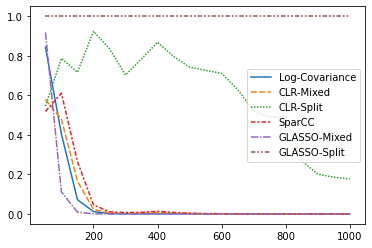

In [282]:
sb.lineplot(data = significance_df.fillna(1))

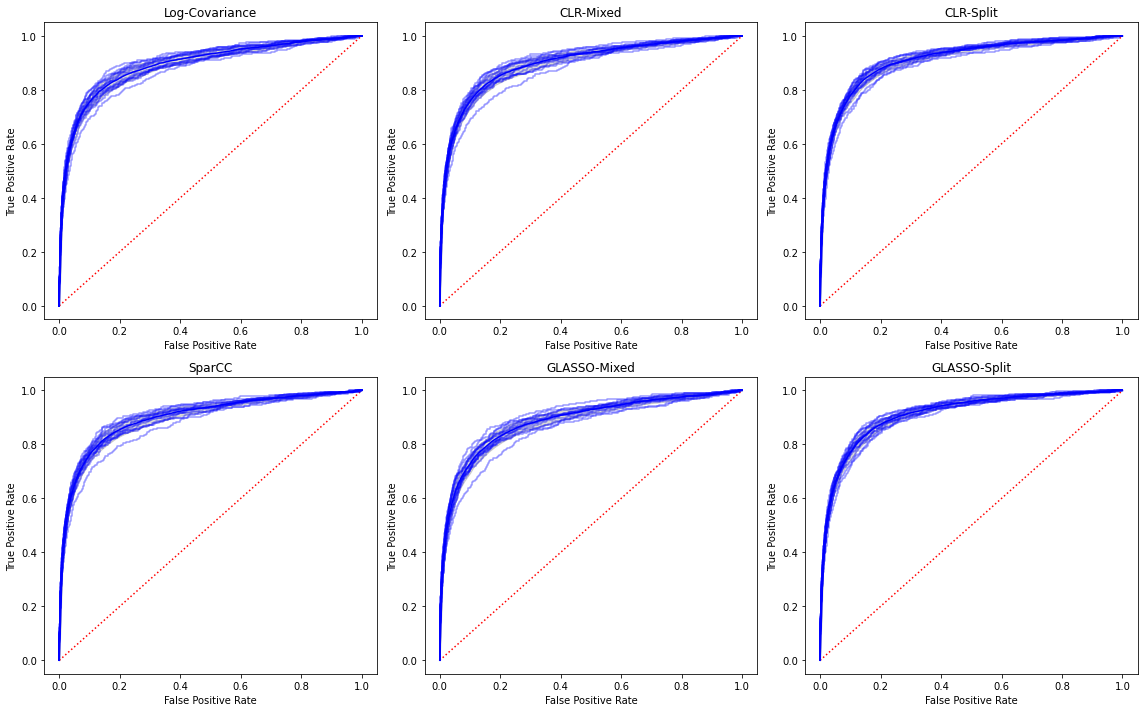

In [45]:
roc_500_edges = all_classifier_performance_topN(all_cov,500)
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    ax[divmod(n,3)].plot([0,1],[0,1],':',color = 'red')
    tprs = []
    for tr in roc_500_edges[1][meth]:
        ax[divmod(n,3)].plot(tr[0],tr[1],color = 'blue',alpha = 0.4)
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax[divmod(n,3)].plot(base_fpr,np.array(tprs).mean(axis = 0),color = 'blue')
    tprs_lower = np.maximum(np.array(tprs).mean(axis = 0) - np.array(tprs).std(axis = 0),0)
    tprs_upper = np.minimum(np.array(tprs).mean(axis = 0) + np.array(tprs).std(axis = 0),1)

    ax[divmod(n,3)].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    ax[divmod(n,3)].set_xlabel("False Positive Rate")
    ax[divmod(n,3)].set_ylabel("True Positive Rate")
    ax[divmod(n,3)].set_title(meth)

In [22]:
XK_roc_all_edges = all_XK_classifier_performance_topN(all_cov,splits,-1)

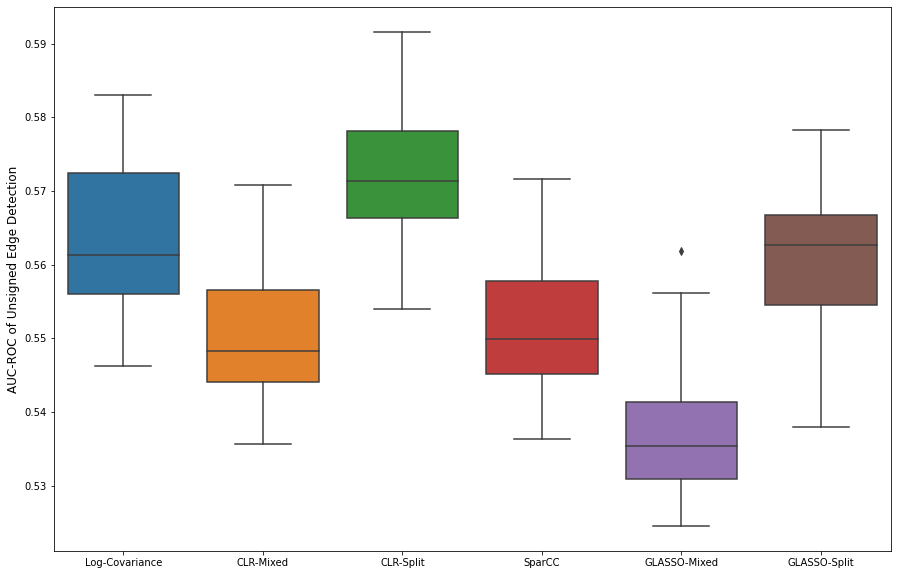

In [105]:
fig,ax = plt.subplots(figsize = (15,10))
sb.boxplot(data = XK_roc_all_edges[0],ax=ax)
ax.set_ylabel("AUC-ROC of Unsigned Edge Detection",size = 12);

In [295]:
significance_df = pd.DataFrame(index = XK_roc_all_edges[0].columns,columns = XK_roc_all_edges[0].columns)
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(XK_roc_all_edges[0][rw],XK_roc_all_edges[0][col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed  \
Log-Covariance            1.0  0.001307  0.022014  0.002779          0.0   
CLR-Mixed            0.001307       1.0  0.000001  0.754323     0.002375   
CLR-Split            0.022014  0.000001       1.0  0.000002          0.0   
SparCC               0.002779  0.754323  0.000002       1.0     0.001078   
GLASSO-Mixed              0.0  0.002375       0.0  0.001078          1.0   
GLASSO-Split         0.576402   0.00587  0.005566  0.011949     0.000002   

               GLASSO-Split  
Log-Covariance     0.576402  
CLR-Mixed           0.00587  
CLR-Split          0.005566  
SparCC             0.011949  
GLASSO-Mixed       0.000002  
GLASSO-Split            1.0

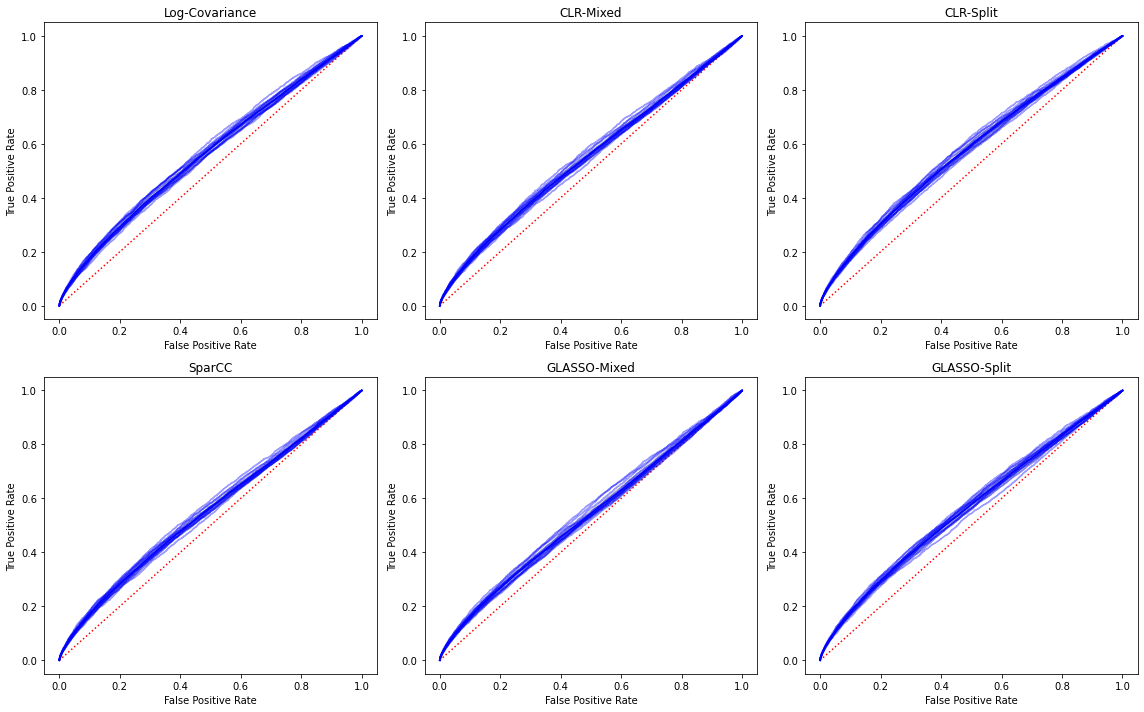

In [24]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    ax[divmod(n,3)].plot([0,1],[0,1],':',color = 'red')
    tprs = []
    for tr in XK_roc_all_edges[1][meth]:
        ax[divmod(n,3)].plot(tr[0],tr[1],color = 'blue',alpha = 0.4)
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax[divmod(n,3)].plot(base_fpr,np.array(tprs).mean(axis = 0),color = 'blue')
    tprs_lower = np.maximum(np.array(tprs).mean(axis = 0) - np.array(tprs).std(axis = 0),0)
    tprs_upper = np.minimum(np.array(tprs).mean(axis = 0) + np.array(tprs).std(axis = 0),1)

    ax[divmod(n,3)].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    ax[divmod(n,3)].set_xlabel("False Positive Rate")
    ax[divmod(n,3)].set_ylabel("True Positive Rate")
    ax[divmod(n,3)].set_title(meth)

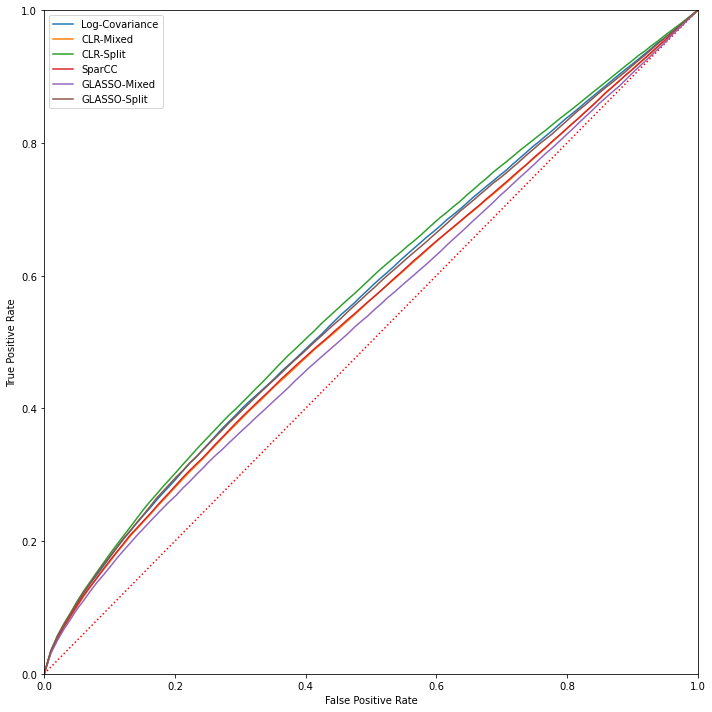

In [323]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)
ax.plot([0,1],[0,1],':',color = 'red')

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    tprs = []
    for tr in XK_roc_all_edges[1][meth]:
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax.plot(base_fpr,np.array(tprs).mean(axis = 0),label=meth)

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.legend()

In [315]:
XK_roc_top_edges = all_XK_classifier_performance(all_cov,splits,Ns = np.arange(50,3950,100))

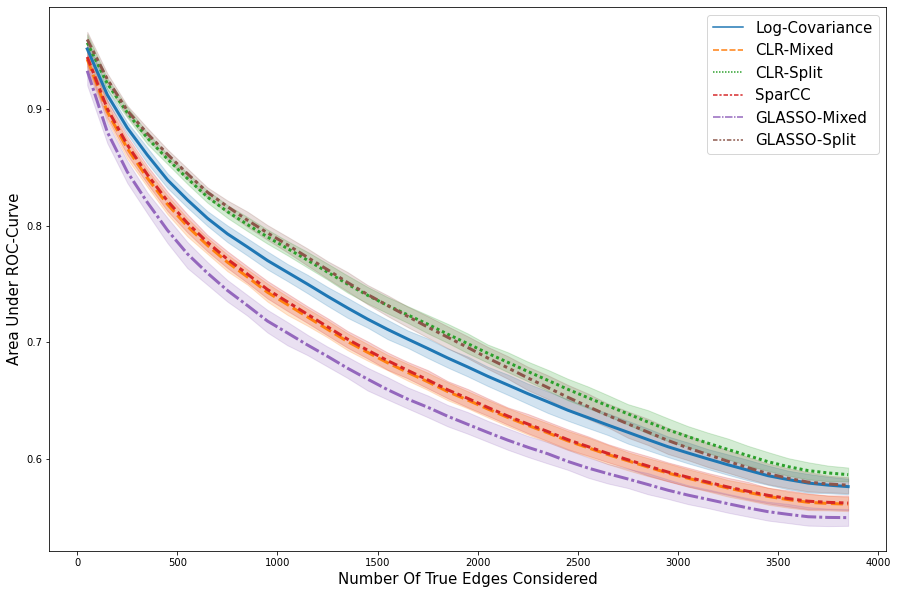

In [316]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = XK_roc_top_edges,ax = ax,linewidth=3)
ax.set_ylabel("Area Under ROC-Curve",size = 15)
ax.set_xlabel("Number Of True Edges Considered",size = 15)
plt.legend(fontsize=15)

In [286]:
test_net = "GLASSO-Split"
significance_df = pd.DataFrame(index = XK_roc_top_edges.index,columns = XK_roc_top_edges.columns.unique())
for col in significance_df.columns:
    for rw in significance_df.index:
        significance_df.loc[rw,col] = stats.ttest_ind(XK_roc_top_edges.loc[rw,test_net],XK_roc_top_edges.loc[rw,col]).pvalue
significance_df

Log-Covariance CLR-Mixed CLR-Split    SparCC GLASSO-Mixed GLASSO-Split
50         0.141932  0.008119  0.596328  0.015944     0.001193          1.0
100        0.016626   0.00003  0.417867  0.000113          0.0          1.0
150        0.001193  0.000003   0.31684  0.000008          0.0          1.0
200        0.001059  0.000001  0.439539  0.000003          0.0          1.0
250        0.000401       0.0  0.622522  0.000001          0.0          1.0
300        0.000746       0.0  0.432054  0.000001          0.0          1.0
350         0.00025       0.0  0.300069       0.0          0.0          1.0
400        0.000016       0.0  0.198229       0.0          0.0          1.0
450        0.000017       0.0  0.216821       0.0          0.0          1.0
500        0.000054       0.0  0.288306       0.0          0.0          1.0
550        0.000013       0.0  0.267826       0.0          0.0          1.0
600        0.000017       0.0  0.298293       0.0          0.0          1.0
650        0.000008       0.0  0.258279       0.0          0.0          1.0
700        0.000024       0.0  0.245943       0.0          0.0          1.0
750         0.00004       0.0  0.289852       0.0          0.0          1.0
800        0.000081       0.0   0.38504       0.0          0.0          1.0
850        0.000115       0.0  0.426757       0.0          0.0          1.0
900        0.000175       0.0  0.410017       0.0          0.0          1.0
950        0.000132       0.0  0.464603       0.0          0.0          1.0
1000       0.000124       0.0    0.5063       0.0          0.0          1.0

<AxesSubplot:>

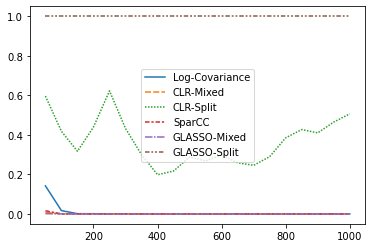

In [287]:
sb.lineplot(data = significance_df.fillna(1))

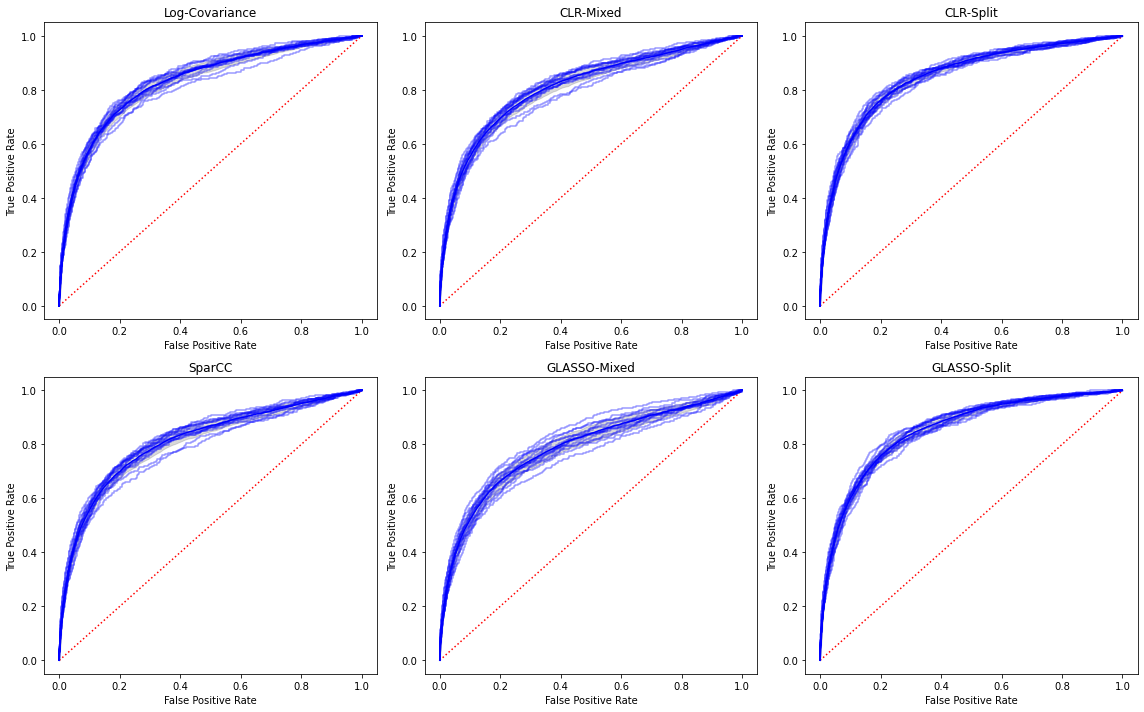

In [27]:
XK_roc_500_edges = all_XK_classifier_performance_topN(all_cov,splits,500)
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    ax[divmod(n,3)].plot([0,1],[0,1],':',color = 'red')
    tprs = []
    for tr in XK_roc_500_edges[1][meth]:
        ax[divmod(n,3)].plot(tr[0],tr[1],color = 'blue',alpha = 0.4)
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax[divmod(n,3)].plot(base_fpr,np.array(tprs).mean(axis = 0),color = 'blue')
    tprs_lower = np.maximum(np.array(tprs).mean(axis = 0) - np.array(tprs).std(axis = 0),0)
    tprs_upper = np.minimum(np.array(tprs).mean(axis = 0) + np.array(tprs).std(axis = 0),1)

    ax[divmod(n,3)].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    ax[divmod(n,3)].set_xlabel("False Positive Rate")
    ax[divmod(n,3)].set_ylabel("True Positive Rate")
    ax[divmod(n,3)].set_title(meth)

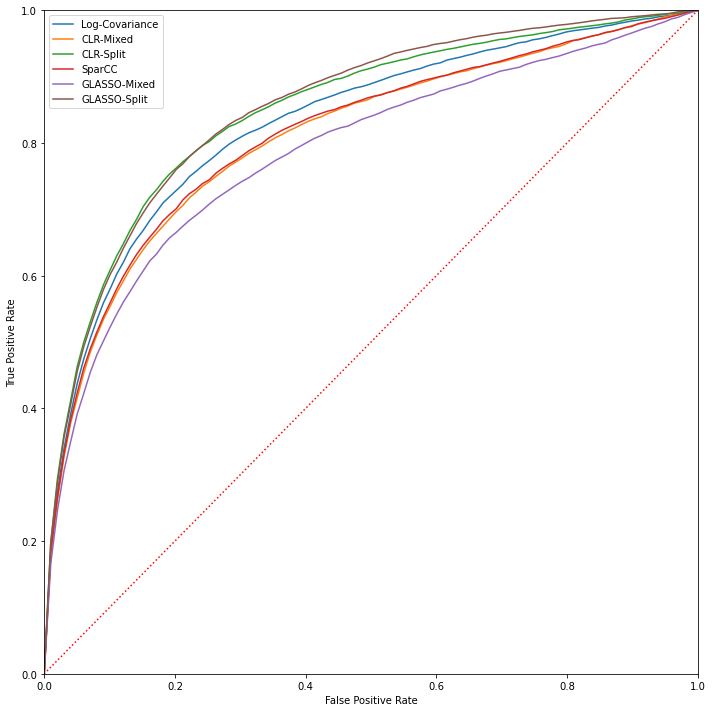

In [324]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)
ax.plot([0,1],[0,1],':',color = 'red')

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    tprs = []
    for tr in XK_roc_500_edges[1][meth]:
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax.plot(base_fpr,np.array(tprs).mean(axis = 0),label=meth)

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_ylim(0,1)
ax.set_xlim(0,1)
plt.legend()

In [28]:
roc_all_hubs = all_hub_performance_topN(all_cov,N=-1,hubct = 0.5)

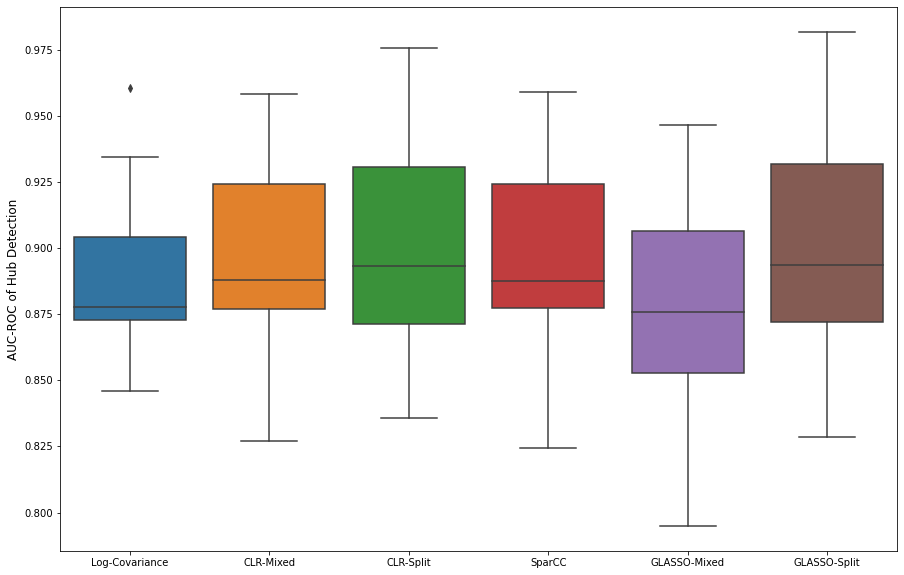

In [101]:
fig,ax = plt.subplots(figsize = (15,10))
sb.boxplot(data = roc_all_hubs[0],ax=ax)
ax.set_ylabel("AUC-ROC of Hub Detection",size = 12);

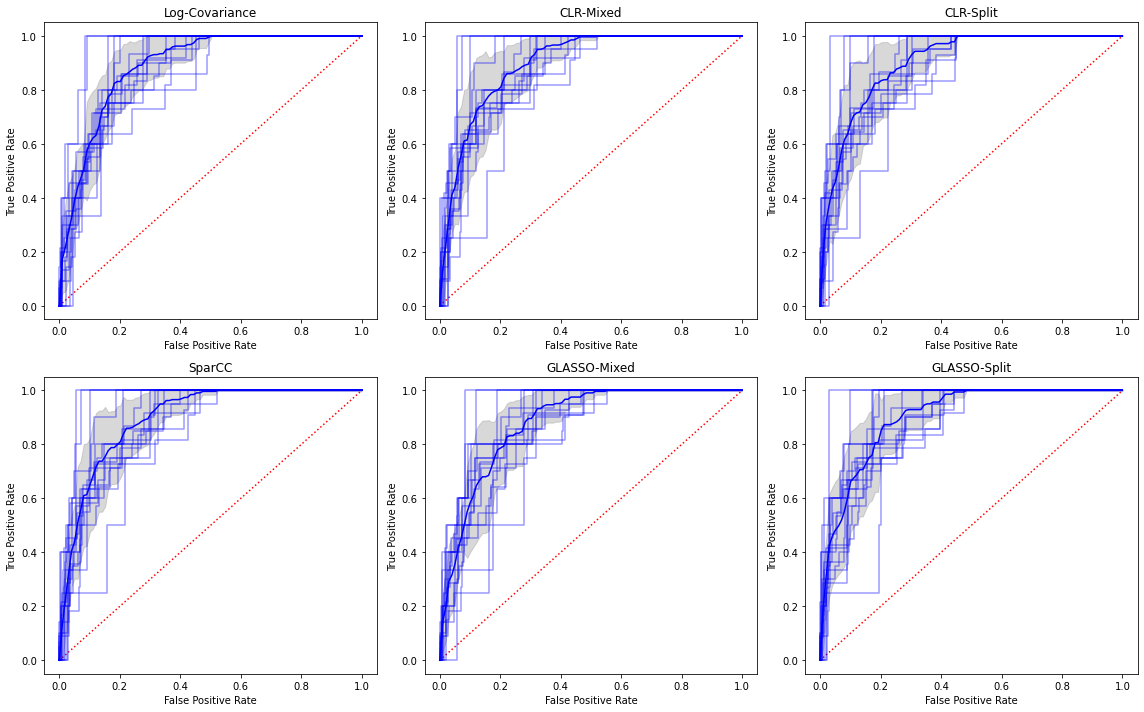

In [30]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
base_fpr = np.linspace(0, 1, 100)

for n,meth in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    
    ax[divmod(n,3)].plot([0,1],[0,1],':',color = 'red')
    tprs = []
    for tr in roc_all_hubs[1][meth]:
        ax[divmod(n,3)].plot(tr[0],tr[1],color = 'blue',alpha = 0.4)
        tpr = np.interp(base_fpr, tr[0], tr[1])
        tpr[0] = 0.0
        tprs.append(tpr)
    ax[divmod(n,3)].plot(base_fpr,np.array(tprs).mean(axis = 0),color = 'blue')
    tprs_lower = np.maximum(np.array(tprs).mean(axis = 0) - np.array(tprs).std(axis = 0),0)
    tprs_upper = np.minimum(np.array(tprs).mean(axis = 0) + np.array(tprs).std(axis = 0),1)

    ax[divmod(n,3)].fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    ax[divmod(n,3)].set_xlabel("False Positive Rate")
    ax[divmod(n,3)].set_ylabel("True Positive Rate")
    ax[divmod(n,3)].set_title(meth)

In [31]:
roc_top_hubs_val = all_hub_performance_byval(all_cov,cuts = np.linspace(0.1,0.99,20))
roc_top_hubs_val

0.100000  0.146842  0.193684  0.240526  0.287368  0.334211  \
Log-Covariance  0.866087  0.852491  0.852473  0.855981  0.844738  0.850359   
CLR-Mixed       0.873537  0.861056  0.862780  0.866482  0.856630  0.860296   
CLR-Split       0.880386  0.865673  0.865392  0.868050  0.858730  0.864802   
SparCC          0.873529  0.860974  0.862669  0.866363  0.856537  0.860082   
GLASSO-Mixed    0.849503  0.841787  0.845748  0.849932  0.841253  0.844672   
GLASSO-Split    0.879461  0.865933  0.866013  0.868457  0.859705  0.866575   

                0.381053  0.427895  0.474737  0.521579  0.568421  0.615263  \
Log-Covariance  0.864413  0.872427  0.876564  0.895211  0.913133  0.913862   
CLR-Mixed       0.874355  0.881158  0.887022  0.902359  0.918571  0.925985   
CLR-Split       0.878279  0.884944  0.891128  0.907662  0.921648  0.930658   
SparCC          0.874123  0.880866  0.886781  0.902090  0.918395  0.926019   
GLASSO-Mixed    0.857706  0.865375  0.868638  0.885027  0.903145  0.907028   
GLASSO-Split    0.878115  0.885639  0.891467  0.908497  0.922050  0.928915   

                0.662105  0.708947  0.755789  0.802632  0.849474  0.896316  \
Log-Covariance  0.917801  0.930210  0.926621  0.924695  0.930091  0.932361   
CLR-Mixed       0.927337  0.942876  0.940728  0.939805  0.943768  0.947632   
CLR-Split       0.933398  0.950424  0.950682  0.950826  0.957231  0.962455   
SparCC          0.927376  0.943022  0.940969  0.939996  0.943848  0.947721   
GLASSO-Mixed    0.905134  0.921021  0.916613  0.914672  0.917560  0.921708   
GLASSO-Split    0.929905  0.948495  0.949427  0.949417  0.955694  0.960361   

                0.943158  0.990000  
Log-Covariance  0.948017  0.949561  
CLR-Mixed       0.963848  0.965593  
CLR-Split       0.976545  0.978689  
SparCC          0.964049  0.965660  
GLASSO-Mixed    0.948014  0.949359  
GLASSO-Split    0.978149  0.980226

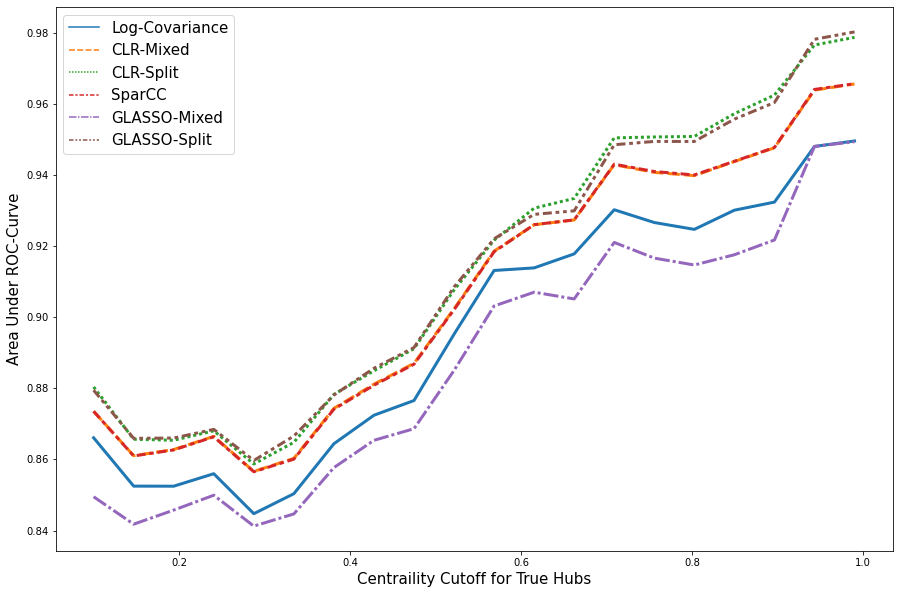

In [103]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = roc_top_hubs_val.T,ax = ax,linewidth=3)
ax.set_ylabel("Area Under ROC-Curve",size = 15)
ax.set_xlabel("Centraility Cutoff for True Hubs",size = 15)
plt.legend(fontsize=15)

In [33]:
roc_top_hubs_N = all_hub_performance_byN(all_cov,Ns = np.arange(5,105,5))
roc_top_hubs_N

5         10        15        20        25        30   \
Log-Covariance  0.896203  0.884333  0.861248  0.853660  0.852655  0.850682   
CLR-Mixed       0.908199  0.888753  0.868401  0.860634  0.861251  0.858872   
CLR-Split       0.915356  0.891921  0.871125  0.862684  0.863165  0.861034   
SparCC          0.907964  0.888361  0.868097  0.860452  0.861175  0.858838   
GLASSO-Mixed    0.889382  0.872037  0.851950  0.844425  0.844129  0.841472   
GLASSO-Split    0.916230  0.891589  0.870508  0.862407  0.862564  0.860004   

                     35        40        45        50        55        60   \
Log-Covariance  0.854233  0.850800  0.849425  0.850449  0.850509  0.848447   
CLR-Mixed       0.861773  0.858275  0.857224  0.858838  0.858418  0.856400   
CLR-Split       0.863195  0.860400  0.859819  0.861442  0.861200  0.859908   
SparCC          0.861769  0.858338  0.857290  0.858871  0.858437  0.856407   
GLASSO-Mixed    0.843970  0.838994  0.837693  0.839441  0.839099  0.835981   
GLASSO-Split    0.861390  0.858757  0.857925  0.859227  0.859065  0.857722   

                     65        70        75        80        85        90   \
Log-Covariance  0.852157  0.852353  0.853407  0.856169  0.852740  0.851820   
CLR-Mixed       0.859241  0.859094  0.860172  0.862457  0.859646  0.858919   
CLR-Split       0.862457  0.862434  0.863370  0.865937  0.863868  0.863366   
SparCC          0.859220  0.859056  0.860153  0.862455  0.859631  0.858894   
GLASSO-Mixed    0.839000  0.839367  0.840154  0.842284  0.838700  0.837996   
GLASSO-Split    0.860266  0.860800  0.861308  0.864105  0.862094  0.861657   

                     95        100  
Log-Covariance  0.854248  0.853677  
CLR-Mixed       0.860890  0.860527  
CLR-Split       0.865531  0.865056  
SparCC          0.860860  0.860499  
GLASSO-Mixed    0.839903  0.839009  
GLASSO-Split    0.863790  0.863219

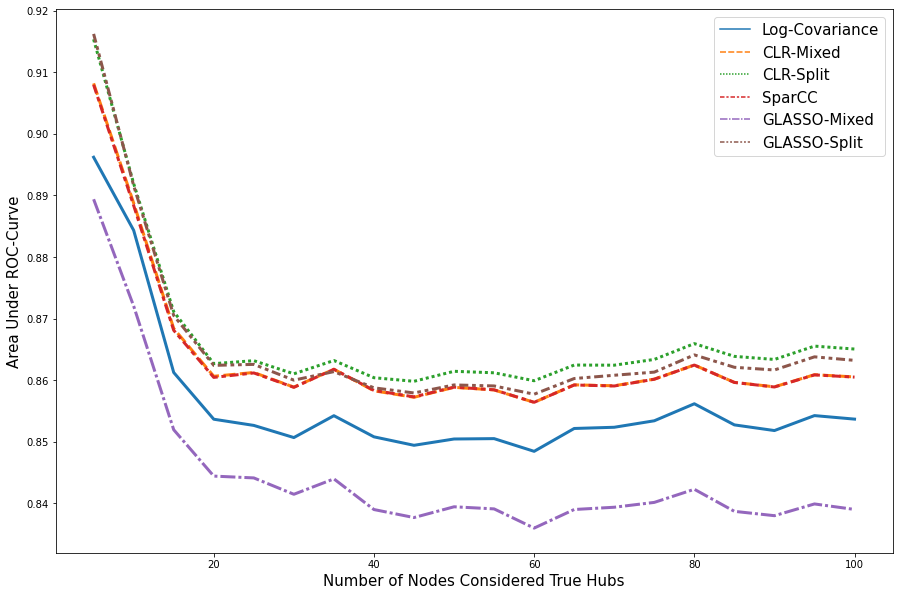

In [94]:
fig,ax = plt.subplots(figsize = (15,10))
sb.lineplot(data = roc_top_hubs_N.T,ax = ax,linewidth=3)
ax.set_ylabel("Area Under ROC-Curve",size = 15)
ax.set_xlabel("Number of Nodes Considered True Hubs",size = 15)
plt.legend(fontsize=15)

In [58]:
tr = 0

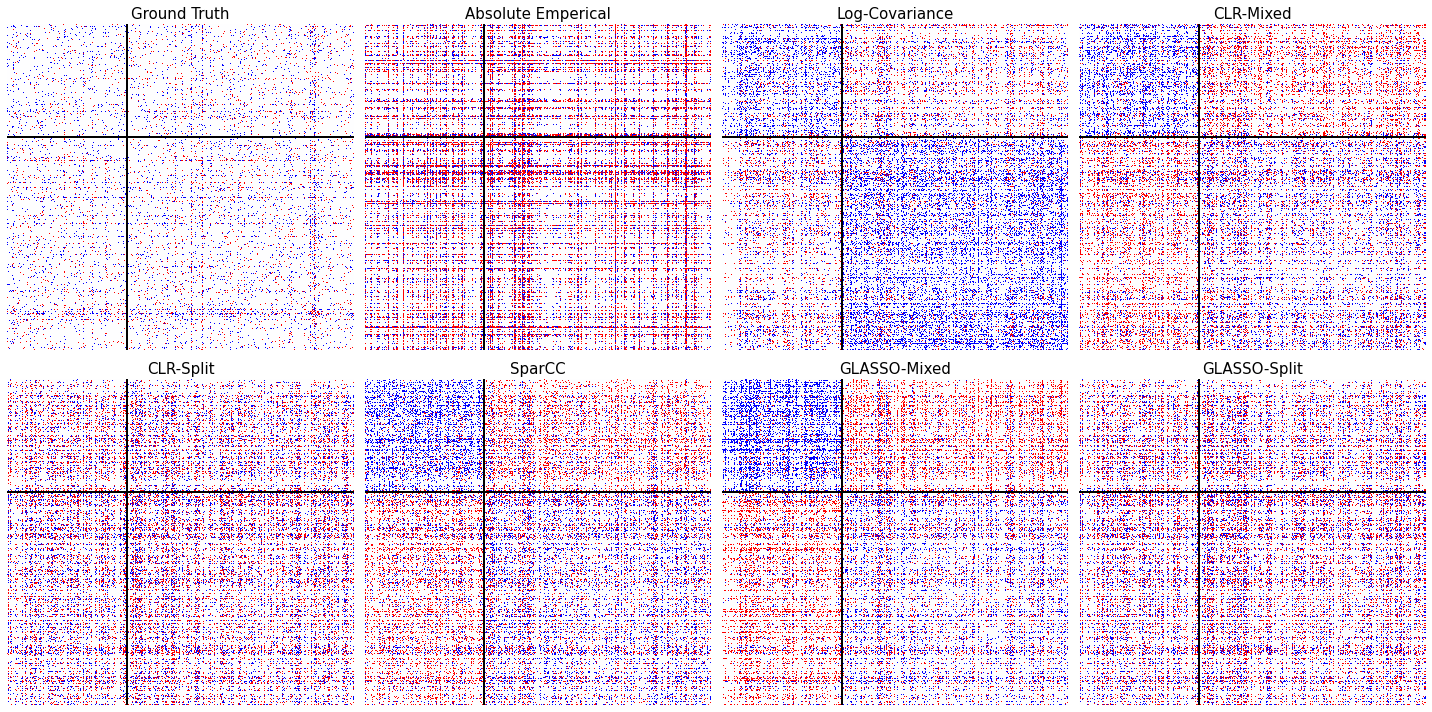

In [95]:
fig,ax = plt.subplots(2,4,figsize = (20,10),tight_layout = True)

for n,meth in enumerate(all_cov[tr].keys()):
    ax[divmod(n,4)].xaxis.set_tick_params(labelbottom=False)
    ax[divmod(n,4)].yaxis.set_tick_params(labelleft=False)

    sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax[divmod(n,4)])
    ax[divmod(n,4)].plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=2)
    ax[divmod(n,4)].plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=2)

    ax[divmod(n,4)].set_xticks([])
    ax[divmod(n,4)].set_yticks([])
    ax[divmod(n,4)].set_title(meth,fontsize=15)



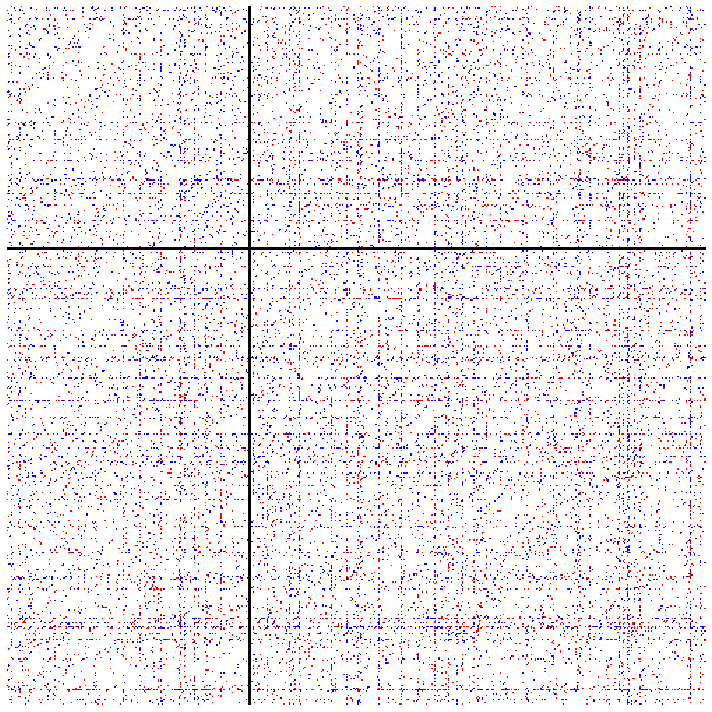

In [116]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth = "Ground Truth"

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.0),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([]);

[]

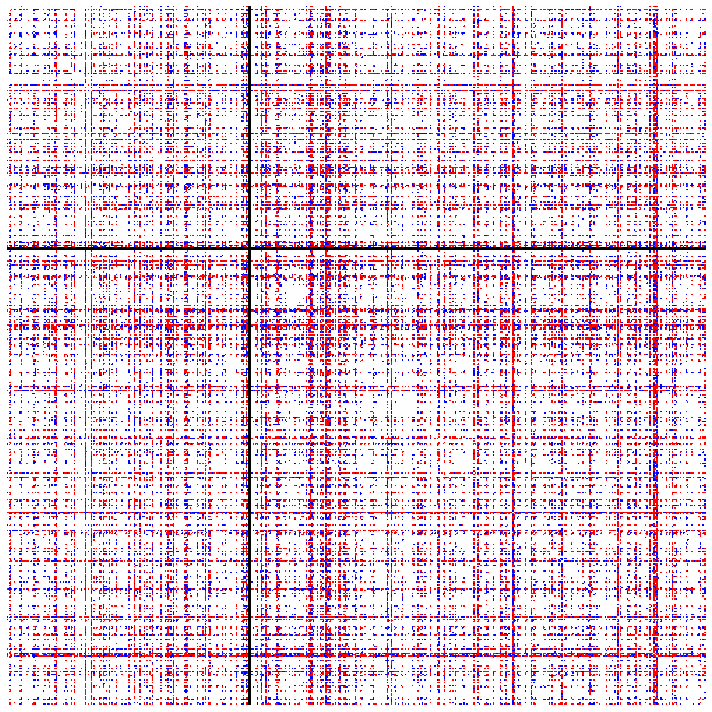

In [115]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth = 'Absolute Emperical'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

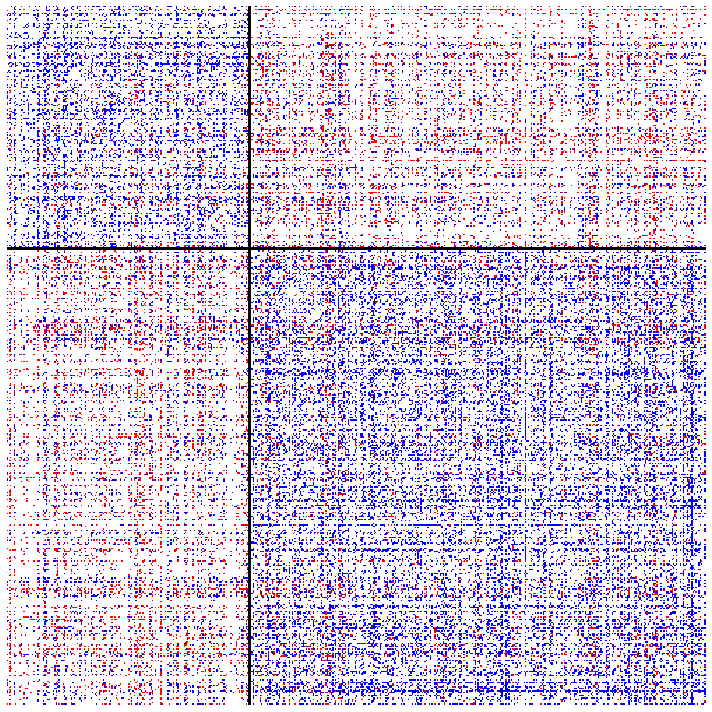

In [117]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth ='Log-Covariance'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

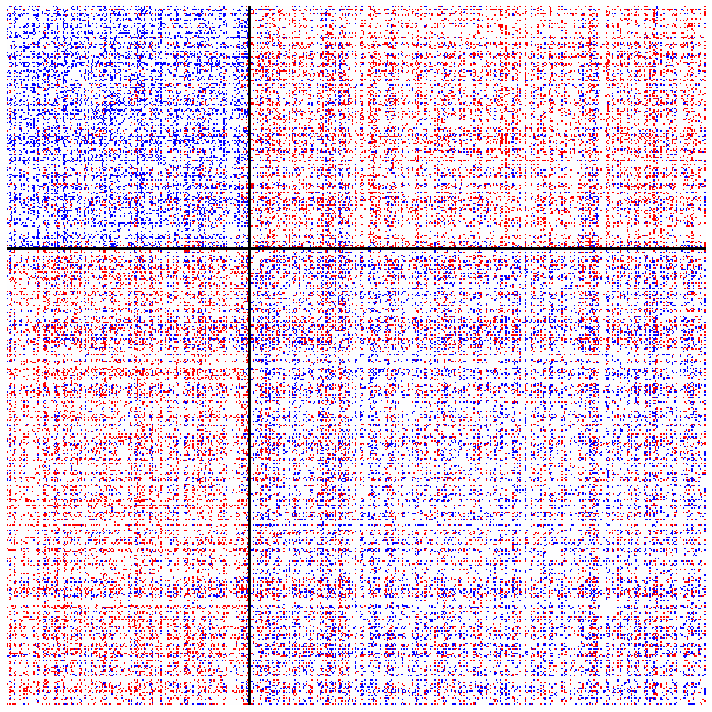

In [118]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)


meth = 'CLR-Mixed'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

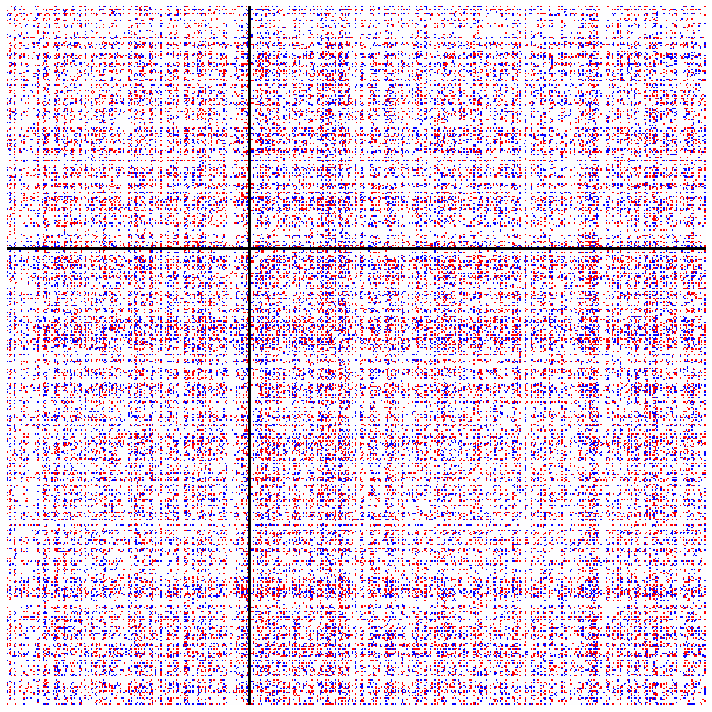

In [119]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth = 'CLR-Split'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

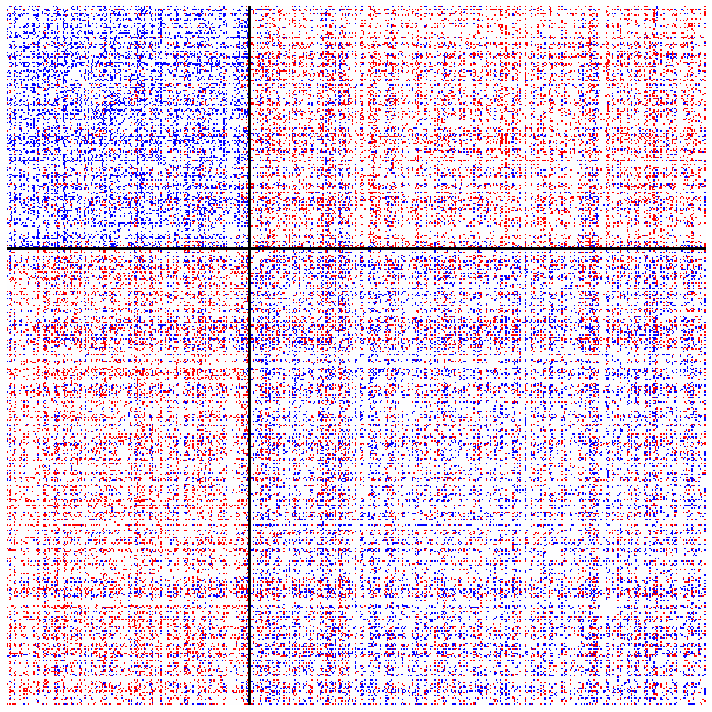

In [120]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth ='SparCC'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

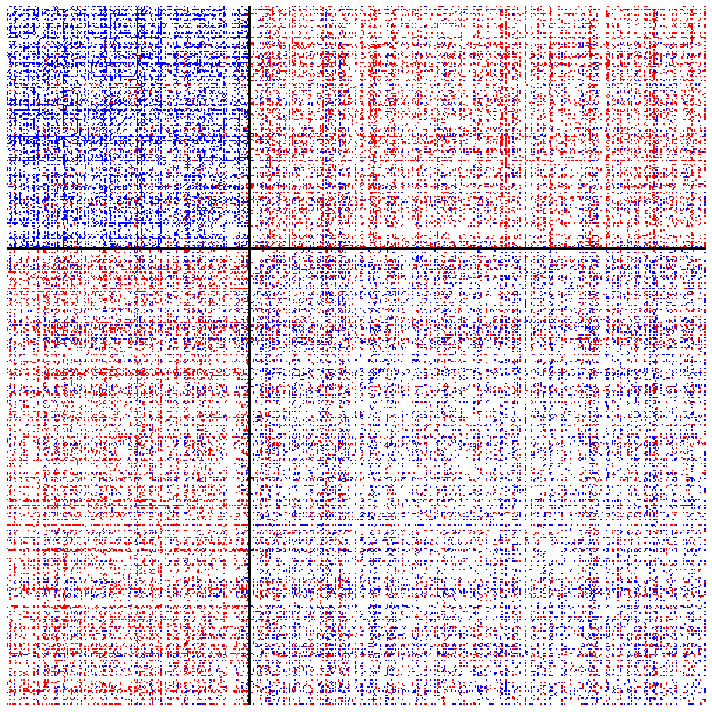

In [121]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth = 'GLASSO-Mixed'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

[]

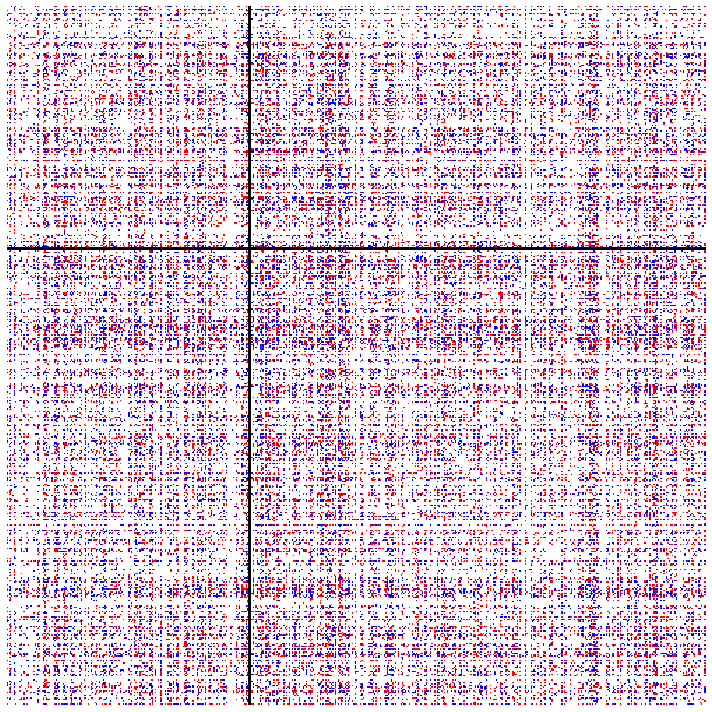

In [122]:
fig,ax = plt.subplots(figsize = (10,10),tight_layout = True)

meth = 'GLASSO-Split'

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

sb.heatmap(topQnet(all_cov[tr][meth].round(8),q=0.9),cmap = "bwr_r",cbar = False,ax = ax)
ax.plot([0,500],[splits.loc[tr,0],splits.loc[tr,0]],color='black',linewidth=3)
ax.plot([splits.loc[tr,0],splits.loc[tr,0]],[0,500],color='black',linewidth=3)

ax.set_xticks([])
ax.set_yticks([])

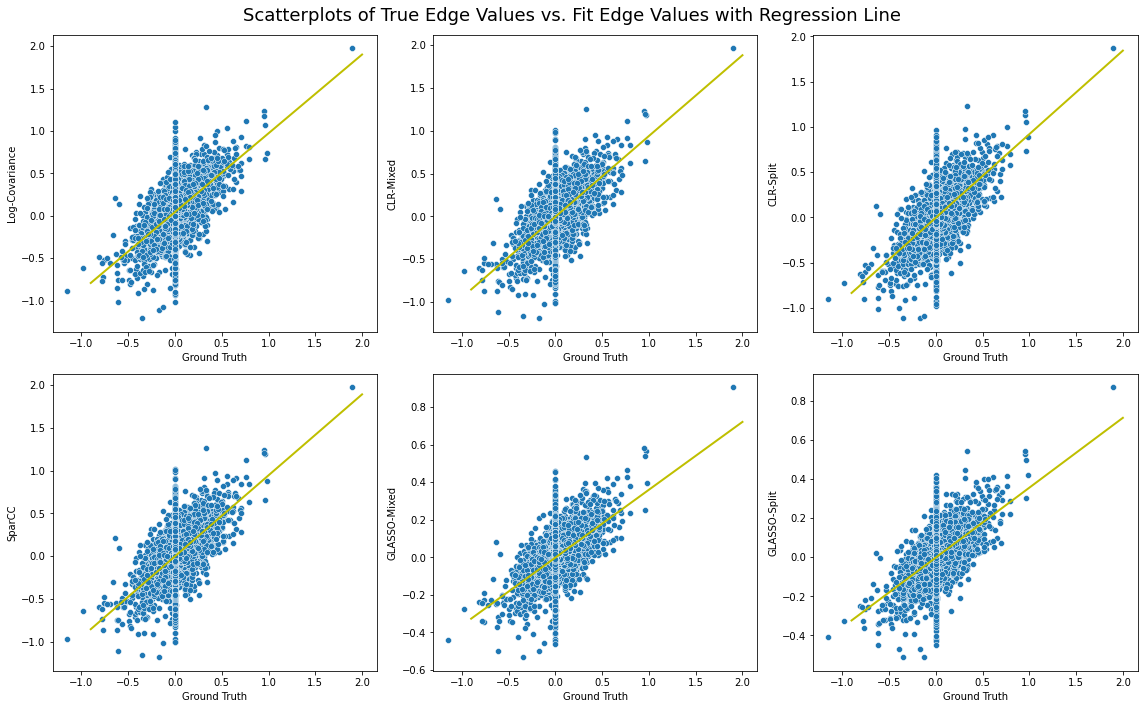

In [128]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
edge_df = make_edge_df(all_cov[tr])
fig.suptitle("Scatterplots of True Edge Values vs. Fit Edge Values with Regression Line",size=18)
for n,col in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    sb.scatterplot(data=edge_df.round(15), x="Ground Truth", y=col,ax = ax[divmod(n,3)])
    x = np.linspace(-0.9,2,1000)
    m,b = np.polyfit(edge_df["Ground Truth"],edge_df[col],1,full = False)
    ax[divmod(n,3)].plot(x,m*x+b,color = 'y',linewidth = 2)

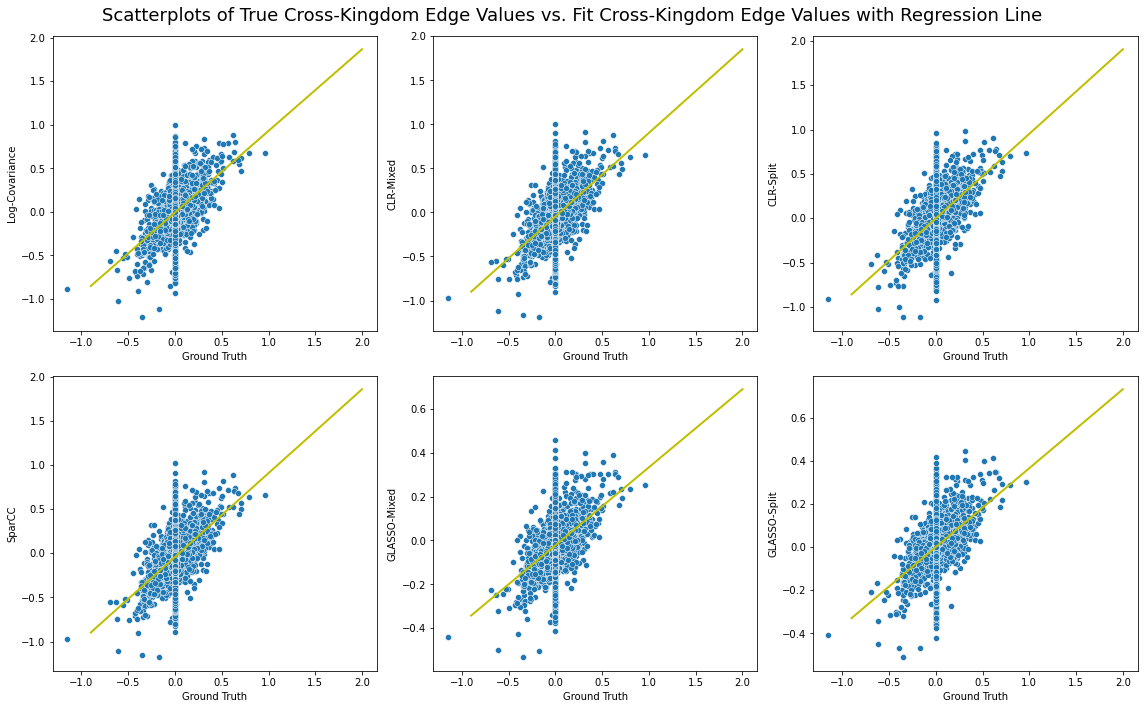

In [132]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
edge_df = make_XK_edge_df(all_cov[tr],splits.loc[tr,0])
fig.suptitle("Scatterplots of True Cross-Kingdom Edge Values vs. Fit Cross-Kingdom Edge Values with Regression Line",size=18)
for n,col in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    sb.scatterplot(data=edge_df.round(15), x="Ground Truth", y=col,ax = ax[divmod(n,3)])
    x = np.linspace(-0.9,2,1000)
    m,b = np.polyfit(edge_df["Ground Truth"],edge_df[col],1,full = False)
    ax[divmod(n,3)].plot(x,m*x+b,color = 'y',linewidth = 2)

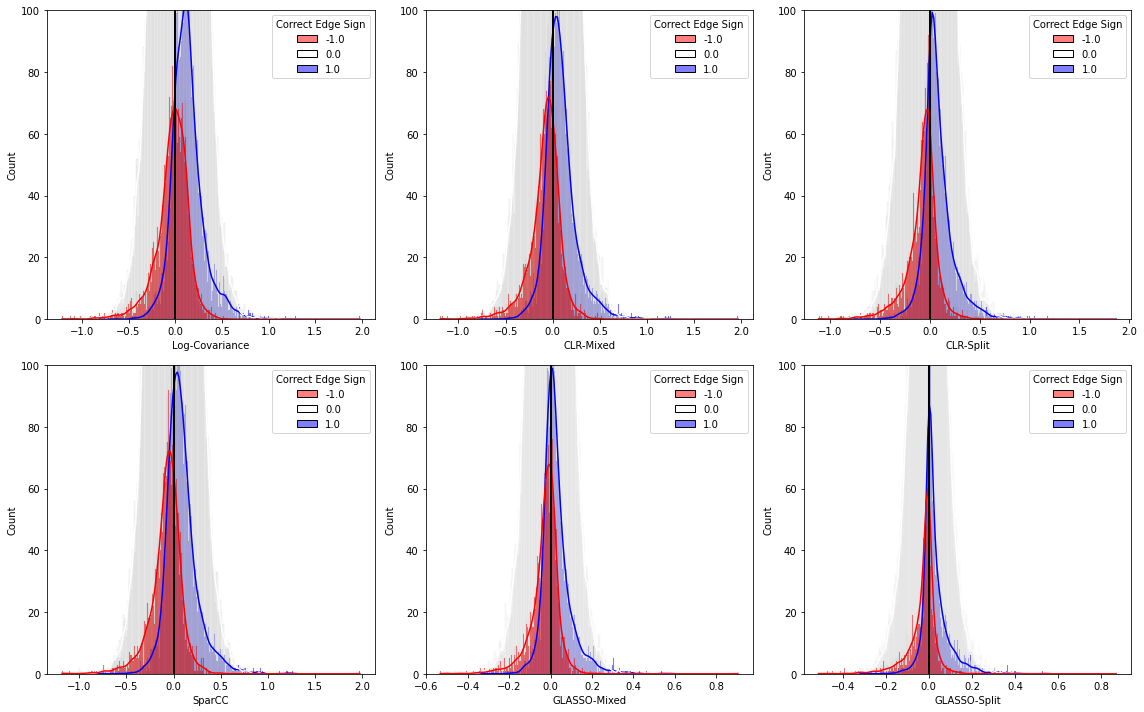

In [38]:
fig,ax = plt.subplots(2,3,figsize = (16,10),tight_layout = True)
edge_df = make_edge_df(all_cov[tr])
edge_df["Correct Edge Sign"] = edge_df["Ground Truth"].round(8).apply(np.sign)
for n,col in enumerate(["Log-Covariance","CLR-Mixed","CLR-Split","SparCC","GLASSO-Mixed","GLASSO-Split"]):
    sb.histplot(data=edge_df.round(15), x=col, hue="Correct Edge Sign",ax = ax[divmod(n,3)],kde = True,palette = "bwr_r")
    ax[divmod(n,3)].plot([0,0],[0,100],linewidth = 2,color = 'k')
    ax[divmod(n,3)].set_ybound(0,100)